<a href="https://colab.research.google.com/github/Nibir-Atik/HeartDiseasePredection/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Heart Disease Prediction

# Load and Explore Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine learning lab/heart_cleveland_upload.csv')


In [4]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [5]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumns:\n", df.columns.tolist())


Dataset Shape: (297, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',

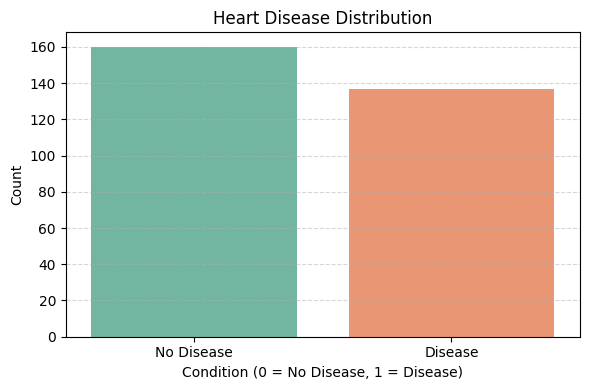

In [6]:
# Target column: 'condition' (0 = No Heart Disease, 1 = Heart Disease)

# Data Preprocessing


X = df.drop(columns=['condition'])
y = df['condition']

# Plot class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='condition', hue='condition', palette='Set2', legend=False)
plt.title('Heart Disease Distribution')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:

# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:

# 1. Random Forest (your original code - unchanged)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef, roc_curve
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("\n=== Random Forest Metrics ===")
print(f"Accuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Specificity (TNR):      {specificity:.5f}")
print(f"False Positive Rate:    {fpr:.5f}")
print(f"False Negative Rate:    {fnr:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")



=== Random Forest Metrics ===
Accuracy:              0.88333
Precision (PPV):        0.95652
Recall (Sensitivity):   0.78571
F1 Score:               0.86275
ROC AUC:                0.93917
Specificity (TNR):      0.96875
False Positive Rate:    0.03125
False Negative Rate:    0.21429
Balanced Accuracy:      0.87723
Matthews Corr Coef:     0.77415


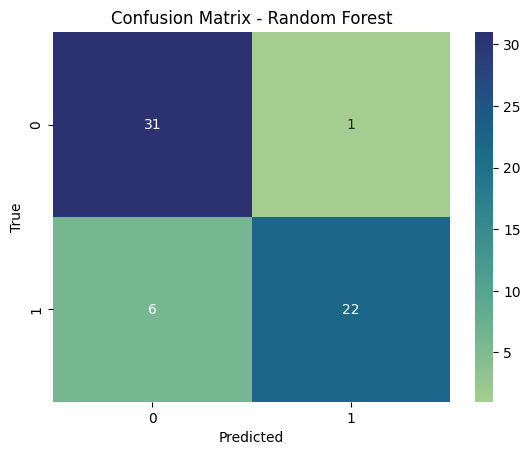

In [10]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



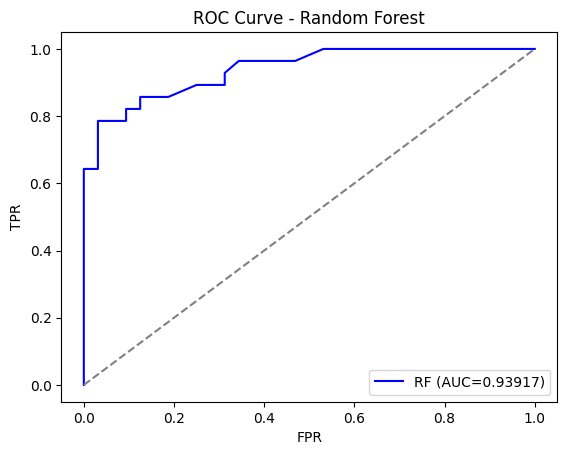

In [11]:
# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"RF (AUC={roc_auc:.5f})", color='blue')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

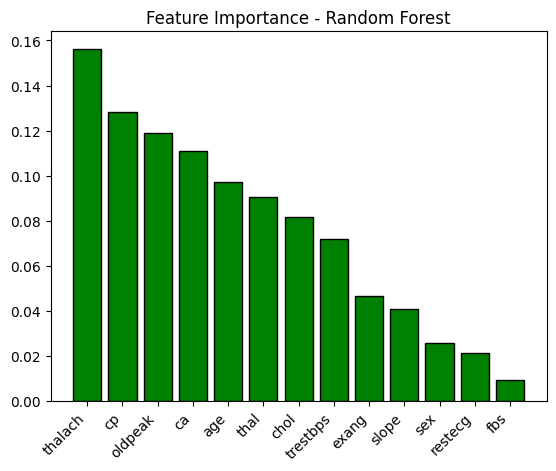

In [12]:
# Feature Importance
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
plt.bar(range(len(features)), importances[indices], align='center', color='green', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.title("Feature Importance - Random Forest")
plt.show()

In [13]:
# 2. KNN Classifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Metrics
print("\n=== KNN Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))


=== KNN Metrics ===
Accuracy: 0.9
Precision: 1.0
Recall: 0.7857142857142857
F1 Score: 0.88
ROC AUC: 0.959263392857143


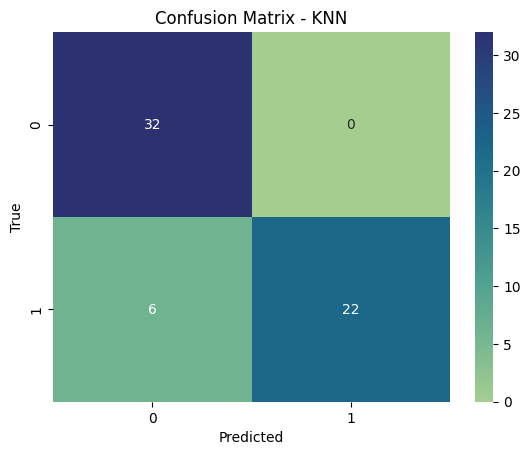

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

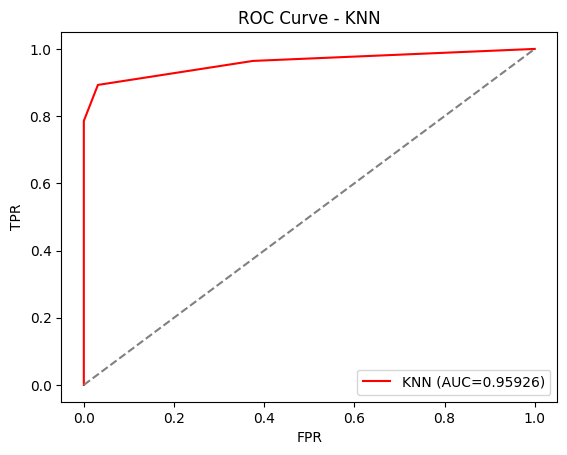

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label=f"KNN (AUC={roc_auc_score(y_test, y_prob_knn):.5f})", color='red')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

In [17]:
# 3. Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(
    criterion="gini",
    class_weight="balanced",
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [18]:
# Metrics
print("\n=== Decision Tree Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))


=== Decision Tree Metrics ===
Accuracy: 0.8
Precision: 0.7857142857142857
Recall: 0.7857142857142857
F1 Score: 0.7857142857142857
ROC AUC: 0.7991071428571428


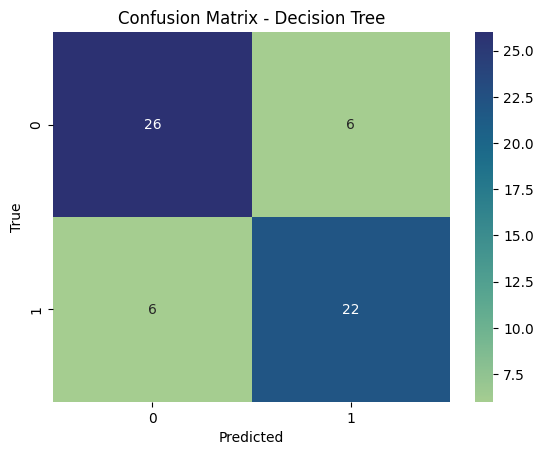

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

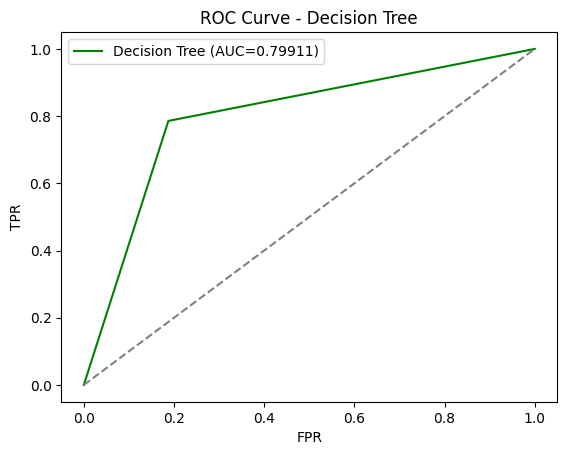

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_prob_dt):.5f})", color='green')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

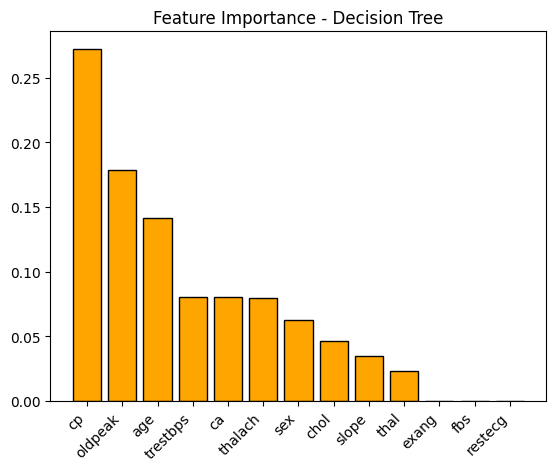

In [21]:
# Feature Importance (Decision Tree)
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(features)), importances[indices], align='center', color='orange', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.title("Feature Importance - Decision Tree")
plt.show()


=== K-Means Clustering Metrics ===
Accuracy: 0.6666666666666666
Precision: 0.6818181818181818
Recall: 0.5357142857142857
F1 Score: 0.6
Adjusted Rand Index: 0.0966668537978269
Silhouette Score: 0.3902629948767618


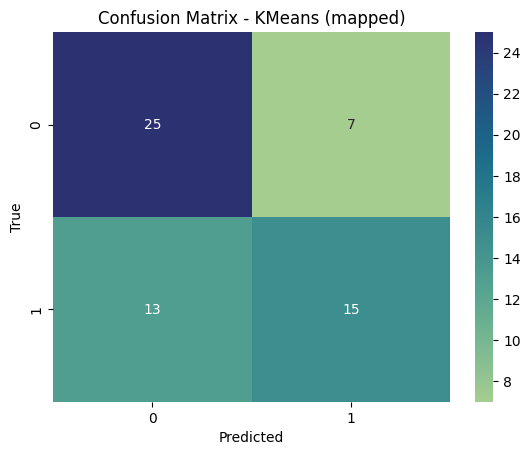

In [22]:
# 4. K-Means Clustering (Unsupervised)

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.stats import mode

# Initialize KMeans with 2 clusters (since condition has 2 classes)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# Predict clusters on test set
y_pred_kmeans = kmeans.predict(X_test)

# Map cluster labels to actual labels (since clustering is unsupervised)
labels_map = {}
for cluster in np.unique(y_pred_kmeans):
    mask = (y_pred_kmeans == cluster)
    majority_label = mode(y_test[mask], keepdims=True).mode[0]
    labels_map[cluster] = majority_label
y_pred_kmeans_mapped = np.array([labels_map[c] for c in y_pred_kmeans])

# Metrics
print("\n=== K-Means Clustering Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_kmeans_mapped))
print("Precision:", precision_score(y_test, y_pred_kmeans_mapped))
print("Recall:", recall_score(y_test, y_pred_kmeans_mapped))
print("F1 Score:", f1_score(y_test, y_pred_kmeans_mapped))
print("Adjusted Rand Index:", adjusted_rand_score(y_test, y_pred_kmeans))
print("Silhouette Score:", silhouette_score(X_test, y_pred_kmeans))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_kmeans_mapped)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.title("Confusion Matrix - KMeans (mapped)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




=== Naïve Bayes Metrics ===
Accuracy: 0.8666666666666667
Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333334
ROC AUC: 0.9129464285714285


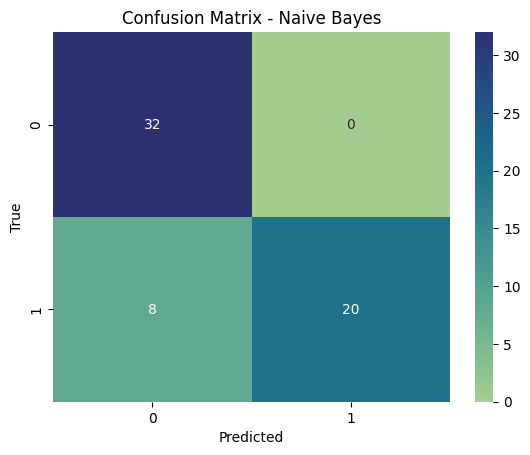

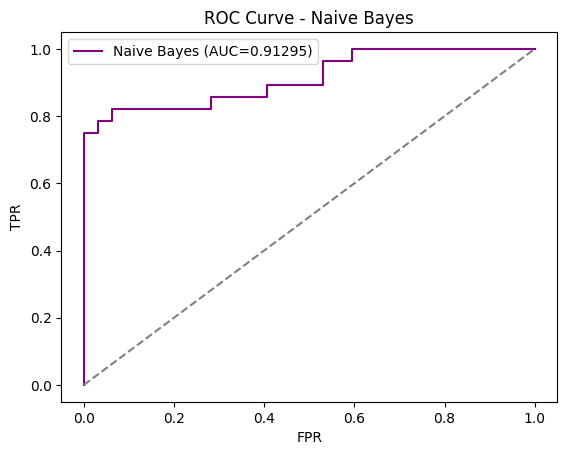

In [23]:
# 5. Naïve Bayes Classifier

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Metrics
print("\n=== Naïve Bayes Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC={roc_auc_score(y_test, y_prob_nb):.5f})", color='purple')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()
